Training Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('final_dataset.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,...,RUL,Vibration (mm/s),Pressure (Pa),Maintenance Required,Temp_Change,Vib_Change,Temperature_Mean,Vibration_Mean,Pressure_Mean,RPM_Mean
0,1,L56106,M,297.3,308.3,1459,59.6,207,1,Power Failure,...,745.661610,-0.495356,1.226757,1,-0.958182,-1.359025,0.216281,0.349232,0.490231,0.626185
1,2,L54029,L,301.1,311.3,1498,37.6,11,0,No Failure,...,4529.506118,-0.765092,0.566438,1,0.126183,-1.316756,-0.022594,0.038504,0.132819,-0.248127
2,3,L53258,L,300.8,310.7,1339,59.1,203,1,Overstrain Failure,...,4019.410836,0.883543,-1.085240,0,-0.954949,-0.086424,-0.835961,0.048053,-0.205369,-0.468898
3,4,L50530,L,301.4,310.8,1285,62.6,183,1,Overstrain Failure,...,389.362128,1.639595,-0.944613,0,-1.230266,0.206654,-0.856195,0.279195,-0.258806,-0.007033
4,5,L51841,L,303.3,311.3,1350,48.1,32,1,Heat Dissipation Failure,...,1639.657411,0.697170,-1.603008,0,0.022523,1.466719,0.595474,0.236426,0.012031,-0.409779


In [4]:
df.shape

(696, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      696 non-null    int64  
 1   Product ID               696 non-null    object 
 2   Type                     696 non-null    object 
 3   Air temperature [K]      696 non-null    float64
 4   Process temperature [K]  696 non-null    float64
 5   Rotational speed [rpm]   696 non-null    int64  
 6   Torque [Nm]              696 non-null    float64
 7   Tool wear [min]          696 non-null    int64  
 8   Target                   696 non-null    int64  
 9   Failure Type             696 non-null    object 
 10  operational_hours        696 non-null    int64  
 11  RUL                      696 non-null    float64
 12  Vibration (mm/s)         696 non-null    float64
 13  Pressure (Pa)            696 non-null    float64
 14  Maintenance Required     6

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,696.0,348.500000,201.062179,1.000000,174.750000,348.500000,522.250000,696.000000
Air temperature [K],696.0,300.487069,2.022437,295.600000,298.775000,300.600000,302.225000,304.400000
Process temperature [K],696.0,310.226437,1.424500,306.100000,309.100000,310.350000,311.200000,313.700000
Rotational speed [rpm],696.0,1512.379310,288.261142,1181.000000,1356.000000,1426.500000,1564.000000,2886.000000
Torque [Nm],696.0,45.056322,14.175301,3.800000,36.425000,46.100000,54.925000,76.600000
Tool wear [min],696.0,123.829023,70.614555,0.000000,64.000000,127.000000,192.000000,253.000000
Target,696.0,0.474138,0.499690,0.000000,0.000000,0.000000,1.000000,1.000000
operational_hours,696.0,2618.890805,1406.915802,118.000000,1392.000000,2665.000000,3835.000000,4995.000000
RUL,696.0,2342.113825,1407.522819,-24.848123,1112.224743,2289.584036,3569.338725,4841.729779
Vibration (mm/s),696.0,0.021720,1.016220,-1.729951,-0.860757,0.038385,0.865448,1.731966


In [7]:
df.describe(include= 'object')

,Product ID,Type,Failure Type
count,696,696,696
unique,696,3,6
top,L56106,L,No Failure
freq,1,442,348


In [8]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
operational_hours          0
RUL                        0
Vibration (mm/s)           0
Pressure (Pa)              0
Maintenance Required       0
Temp_Change                0
Vib_Change                 0
Temperature_Mean           0
Vibration_Mean             0
Pressure_Mean              0
RPM_Mean                   0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# Filtering Categorical Calumns
cat_cols= df.select_dtypes(include= 'O').columns.tolist()

In [11]:
# Print Categorical Columns
cat_cols

['Product ID', 'Type', 'Failure Type']

In [12]:
# value counts for categorical columns
for col in cat_cols:
    print(df[col].value_counts())

Product ID
L56106    1
L52250    1
M15740    1
H29997    1
L52299    1
         ..
L49732    1
L54744    1
L50894    1
L56394    1
L52236    1
Name: count, Length: 696, dtype: int64
Type
L    442
M    196
H     58
Name: count, dtype: int64
Failure Type
No Failure                  348
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
Random Failures              18
Name: count, dtype: int64


In [13]:
df_f = df[df.Target==1]
df_f['Failure Type'].value_counts()

Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
Name: count, dtype: int64

In [14]:
idx= df_f[df_f['Failure Type']== 'No Failure'].index
df.drop(idx, axis=0, inplace= True)

In [15]:
df_f = df[df.Target==0]
df_f['Failure Type'].value_counts()

Failure Type
No Failure         348
Random Failures     18
Name: count, dtype: int64

In [16]:
idx= df_f[df_f['Failure Type']== 'Random Failures'].index
df.drop(idx, axis=0, inplace= True)

In [17]:
# Shape Check
df.shape

(678, 21)

In [18]:
num_cols= df.select_dtypes(exclude='O').columns.tolist()
num_cols

['UDI',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'operational_hours',
 'RUL',
 'Vibration (mm/s)',
 'Pressure (Pa)',
 'Maintenance Required',
 'Temp_Change',
 'Vib_Change',
 'Temperature_Mean',
 'Vibration_Mean',
 'Pressure_Mean',
 'RPM_Mean']

DATA VISUALISATION

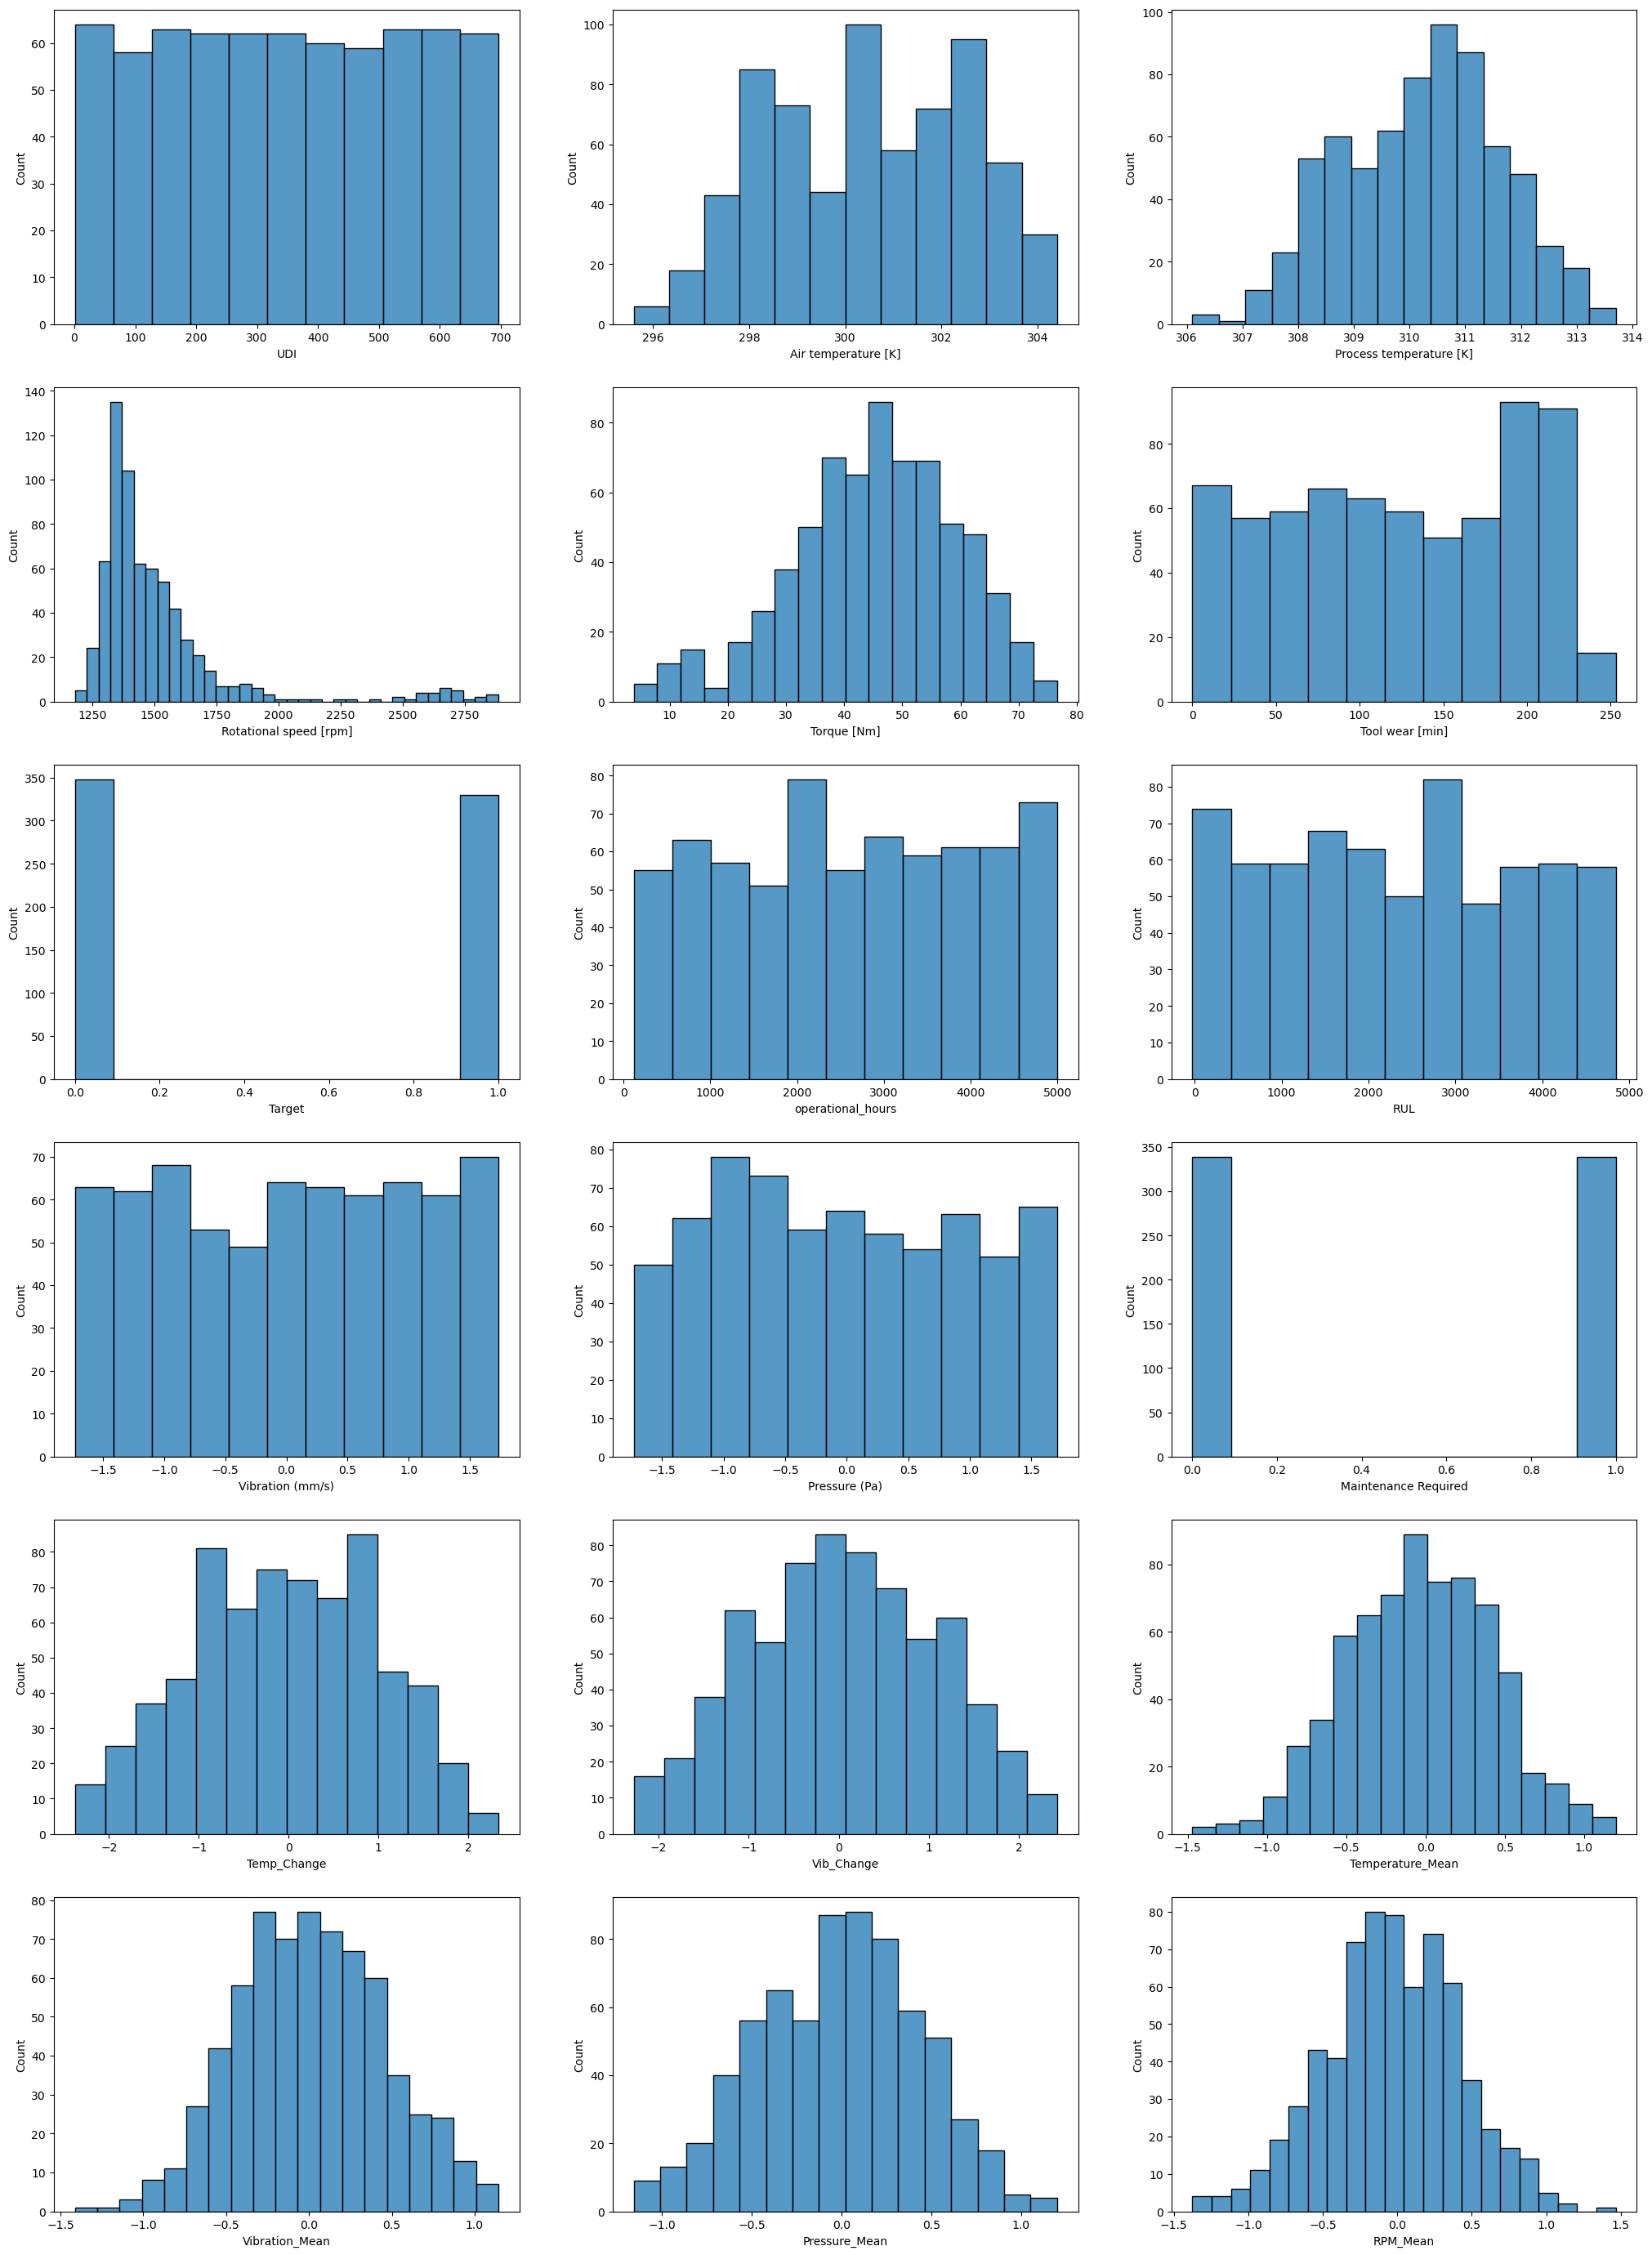

In [19]:
# Pair Plot
plt.figure(figsize= (25,35))

for i, col in  enumerate(num_cols, 1):
    plt.subplot(6,3,i)
    sns.histplot(data= df, x= col)
plt.show()

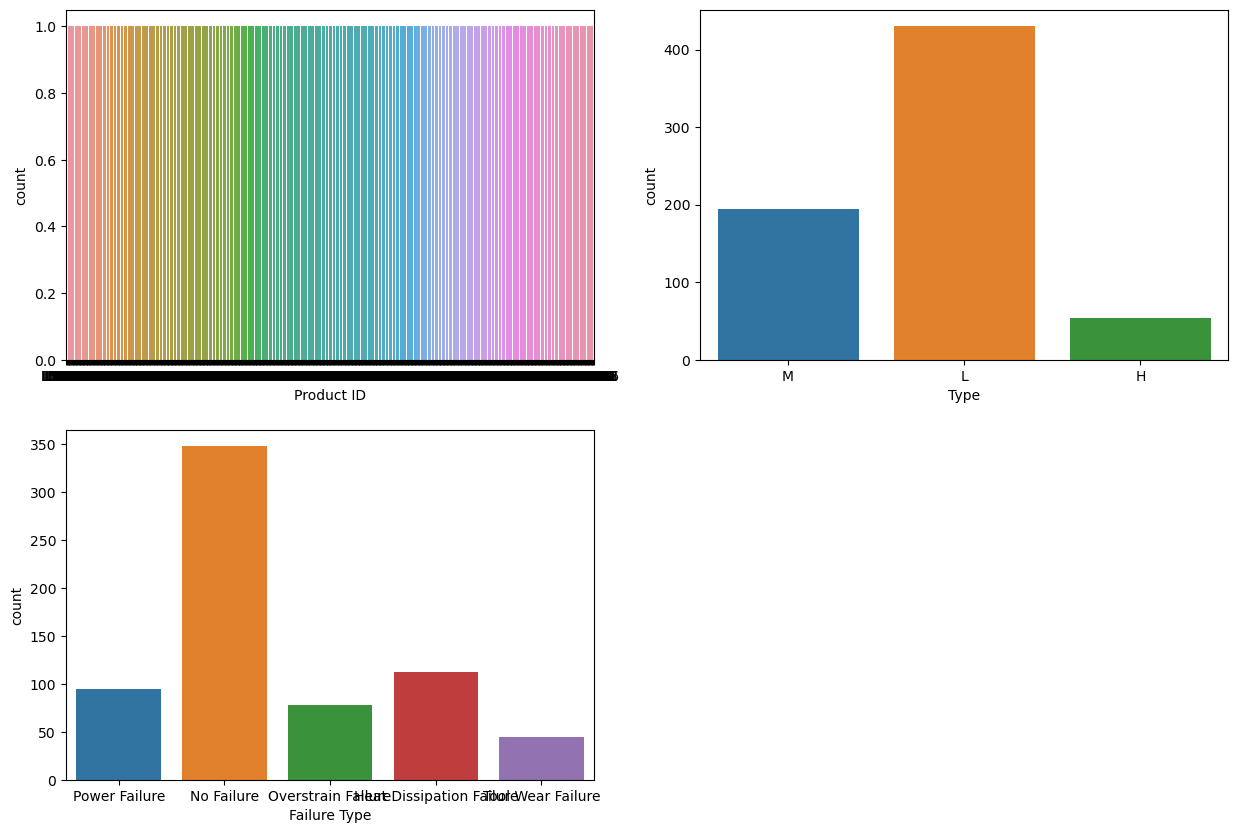

In [20]:
plt.figure(figsize= (15,10))

for i, col in  enumerate(cat_cols, 1):
    plt.subplot(2,2,i)
    sns.countplot(data= df, x= col)
plt.show()

TRAINING MODEL

In [21]:
# Preparing data for model Training

x= df.drop(['Target', 'Failure Type'], axis= 1)
y= df['Target']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Splitting Data Into Train and test
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [24]:
# Filtering the Categorical and Numerical Features for the Further Analysis and Operations
cat_cols= X_train.select_dtypes(include= "O").columns.tolist()
num_cols= X_train.select_dtypes(exclude= "O").columns.tolist()

In [25]:
cat_cols

['Product ID', 'Type']

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [27]:
# Column Transformation For the Numerical and categorical features
enc= OneHotEncoder(handle_unknown= 'ignore')
sc= StandardScaler()

ct= ColumnTransformer(
        [
            ('encoding', enc, cat_cols),
            ('scaling', sc, num_cols)
        ]
)

In [28]:
X_train= ct.fit_transform(X_train)
X_test = ct.transform(X_test)


Logistic Regression Model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
# Fit the Modle on train data
clf= LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred= clf.predict(X_test)

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        77
           1       0.79      0.81      0.80        59

    accuracy                           0.82       136
   macro avg       0.82      0.82      0.82       136
weighted avg       0.82      0.82      0.82       136



In [34]:
Logistic = accuracy_score(y_test, y_pred)
print('Logistic Regession: ', Logistic)

Logistic Regession:  0.8235294117647058


In [35]:
confusion_matrix(y_test, y_pred)

array([[64, 13],
       [11, 48]], dtype=int64)

In [36]:
roc_auc_score(y_test, y_pred)

0.8223640766013648

Text(0, 0.5, 'True Positive Rate')

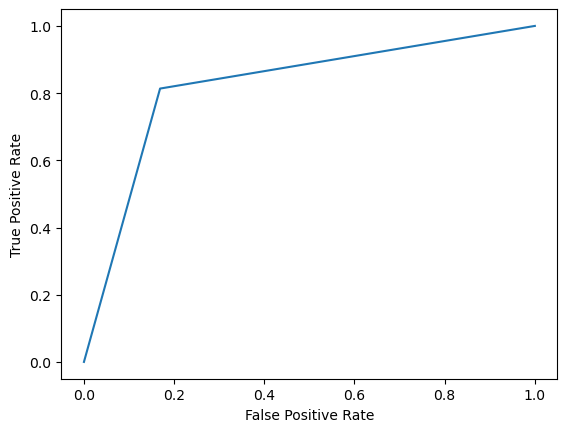

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [38]:
# Train data Analysis For Logistic Regression

In [39]:
y_pred_t= clf.predict(X_train)

In [40]:
print(classification_report(y_train, y_pred_t))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       271
           1       0.90      0.91      0.90       271

    accuracy                           0.90       542
   macro avg       0.90      0.90      0.90       542
weighted avg       0.90      0.90      0.90       542



In [41]:
accuracy_score(y_train, y_pred_t)

0.9022140221402214

In [42]:
confusion_matrix(y_train,y_pred_t)

array([[243,  28],
       [ 25, 246]], dtype=int64)


Support Vector MAchines

In [43]:
from sklearn.svm import SVC

In [44]:
svm= SVC()

In [45]:
svm.fit(X_train,y_train)

SVC()

In [46]:
y_pred_svm= svm.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83        77
           1       0.78      0.76      0.77        59

    accuracy                           0.80       136
   macro avg       0.80      0.80      0.80       136
weighted avg       0.80      0.80      0.80       136



In [48]:
SVM =accuracy_score(y_test, y_pred_svm)
print('SVM :', SVM)

SVM : 0.8014705882352942


In [49]:
confusion_matrix(y_test, y_pred_svm)

array([[64, 13],
       [14, 45]], dtype=int64)

In [50]:
roc_auc_score(y_test, y_pred_svm)

0.7969403477878054

Text(0, 0.5, 'True Positive Rate')

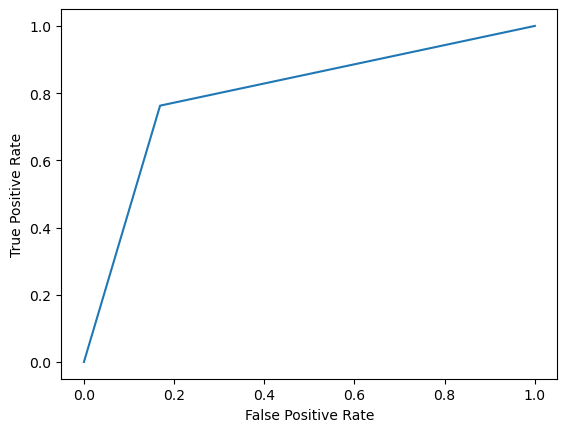

In [51]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred_svm)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [52]:
# Train data

In [53]:
y_pred_svmt = svm.predict(X_train)

In [54]:
print(classification_report(y_train, y_pred_svmt))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       271
           1       0.96      0.97      0.97       271

    accuracy                           0.96       542
   macro avg       0.96      0.96      0.96       542
weighted avg       0.96      0.96      0.96       542



In [55]:
accuracy_score(y_train, y_pred_svmt)

0.9649446494464945

In [56]:
confusion_matrix(y_train, y_pred_svmt)

array([[261,  10],
       [  9, 262]], dtype=int64)

In [57]:
roc_auc_score(y_train, y_pred_svmt)

0.9649446494464945

Text(0, 0.5, 'True Positive Rate')

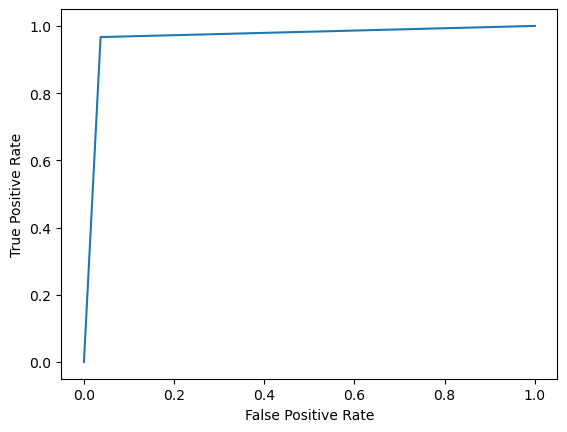

In [58]:
fpr, tpr, thresholds= roc_curve(y_train, y_pred_svmt)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


SVM Model with RBF Kernel

In [59]:
rbf= SVC(kernel= 'rbf')

In [60]:
rbf.fit(X_train, y_train)

SVC()

In [61]:
y_rbf = rbf.predict(X_test)

In [62]:
print(classification_report(y_test, y_rbf))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83        77
           1       0.78      0.76      0.77        59

    accuracy                           0.80       136
   macro avg       0.80      0.80      0.80       136
weighted avg       0.80      0.80      0.80       136



In [63]:
svm_rbf= accuracy_score(y_test, y_rbf)
print('SVM Modle with RBF Kernel: ', svm_rbf)

SVM Modle with RBF Kernel:  0.8014705882352942


In [64]:
confusion_matrix(y_test, y_rbf)

array([[64, 13],
       [14, 45]], dtype=int64)

In [65]:
roc_auc_score(y_test, y_rbf)

0.7969403477878054

Text(0, 0.5, 'True Positive Rate')

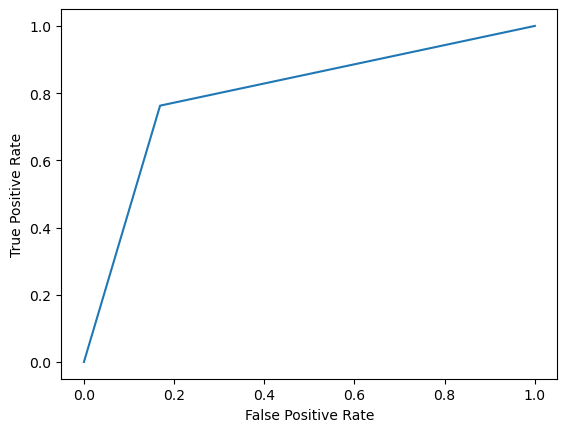

In [66]:
fpr, tpr, _ = roc_curve(y_test, y_rbf) 
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [67]:
y_rbft= rbf.predict(X_train)

In [68]:
print(classification_report(y_train, y_rbft))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       271
           1       0.96      0.97      0.97       271

    accuracy                           0.96       542
   macro avg       0.96      0.96      0.96       542
weighted avg       0.96      0.96      0.96       542



In [69]:
accuracy_score(y_train, y_rbft)

0.9649446494464945

In [70]:
confusion_matrix(y_train, y_rbft)

array([[261,  10],
       [  9, 262]], dtype=int64)

Text(0, 0.5, 'TPR')

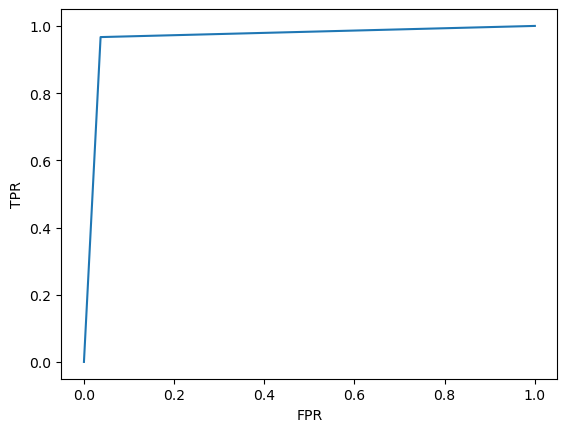

In [71]:
fpr, tpr, _= roc_curve(y_train, y_rbft)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
tree= DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
y_tree= tree.predict(X_test)

In [75]:
print(classification_report(y_test, y_tree))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        77
           1       0.88      0.85      0.86        59

    accuracy                           0.88       136
   macro avg       0.88      0.88      0.88       136
weighted avg       0.88      0.88      0.88       136



In [76]:
decision_tree= accuracy_score(y_test, y_tree)
print('Decision Tree: ', decision_tree)

Decision Tree:  0.8823529411764706


In [77]:
confusion_matrix(y_test, y_tree)

array([[70,  7],
       [ 9, 50]], dtype=int64)

In [78]:
roc_auc_score(y_test, y_tree)

0.8782742681047766

Text(0, 0.5, 'TPR')

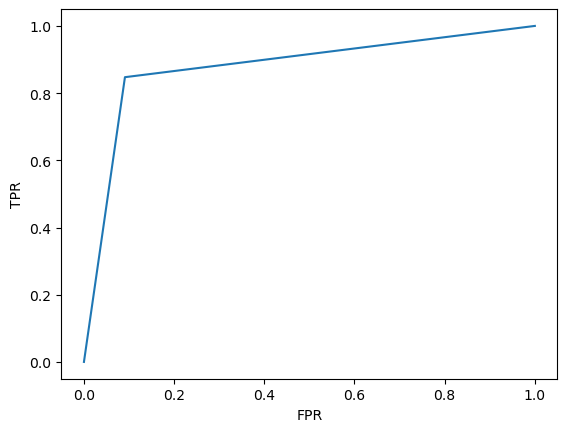

In [79]:
fpr, tpr,_ = roc_curve(y_test, y_tree)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [80]:
y_treet= tree.predict(X_train)

In [81]:
print(classification_report(y_train, y_treet))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      1.00      1.00       271

    accuracy                           1.00       542
   macro avg       1.00      1.00      1.00       542
weighted avg       1.00      1.00      1.00       542



In [82]:
accuracy_score(y_train, y_treet)

1.0

In [83]:
confusion_matrix(y_train, y_treet)

array([[271,   0],
       [  0, 271]], dtype=int64)

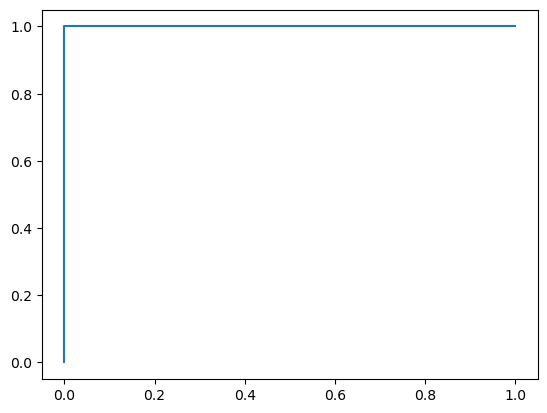

In [84]:
fpr, tpr, _= roc_curve(y_train, y_treet)
plt.plot(fpr, tpr)

In [85]:
roc_auc_score(y_train, y_treet)

1.0


Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
forest= RandomForestClassifier()

In [88]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
y_forest= forest.predict(X_test)

In [90]:
print(classification_report(y_test, y_forest))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        77
           1       0.90      0.90      0.90        59

    accuracy                           0.91       136
   macro avg       0.91      0.91      0.91       136
weighted avg       0.91      0.91      0.91       136



In [91]:
random_forest = accuracy_score(y_test, y_forest)
print('Random Forest: ', random_forest)

Random Forest:  0.9117647058823529


In [92]:
confusion_matrix(y_test, y_forest)

array([[71,  6],
       [ 6, 53]], dtype=int64)

In [93]:
roc_auc_score(y_test, y_forest)

0.9101915034118423

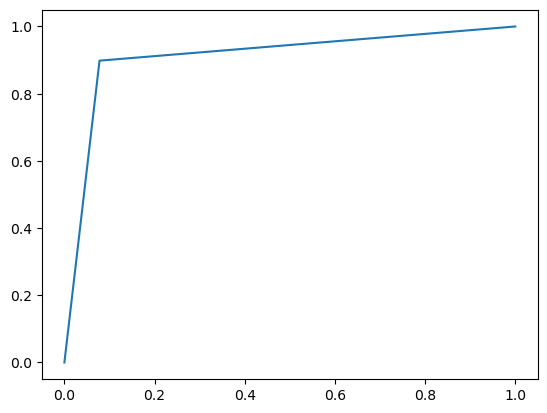

In [94]:
fpr, tpr, _= roc_curve(y_test, y_forest)
plt.plot(fpr, tpr)

In [95]:
y_forestt= forest.predict(X_train)

In [96]:
print(classification_report(y_train, y_forestt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      1.00      1.00       271

    accuracy                           1.00       542
   macro avg       1.00      1.00      1.00       542
weighted avg       1.00      1.00      1.00       542



In [97]:
confusion_matrix(y_train, y_forestt)

array([[271,   0],
       [  0, 271]], dtype=int64)


Model Comparision

In [98]:
print('Logistic Regession: ', Logistic)
print('SVM :', SVM)
print('SVM Modle with RBF Kernel: ', svm_rbf)
print('Decision Tree: ', decision_tree)
print('Random Forest: ', random_forest)

Logistic Regession:  0.8235294117647058
SVM : 0.8014705882352942
SVM Modle with RBF Kernel:  0.8014705882352942
Decision Tree:  0.8823529411764706
Random Forest:  0.9117647058823529


In [99]:
!pip install pycaret

In [100]:
import pycaret

In [101]:
from pycaret.classification import *

s= setup(df, target = 'Failure Type', session_id = 42, data_split_stratify=True)

,Description,Value
0,Session id,42
1,Target,Failure Type
2,Target type,Multiclass
3,Target mapping,"Heat Dissipation Failure: 0, No Failure: 1, Overstrain Failure: 2, Power Failure: 3, Tool Wear Failure: 4"
4,Original data shape,"(678, 21)"
5,Transformed data shape,"(678, 23)"
6,Transformed train set shape,"(474, 23)"
7,Transformed test set shape,"(204, 23)"
8,Numeric features,18
9,Categorical features,2


In [102]:
# Identify the top-performing model based on the Area Under the Curve (AUC) metric
best_model = compare_models(sort='AUC')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8860,0.9954,0.8860,0.8662,0.8647,0.8245,0.8329,0.0750
et,Extra Trees Classifier,0.8314,0.9915,0.8314,0.8528,0.8181,0.7491,0.7666,0.0660
nb,Naive Bayes,0.8442,0.9865,0.8442,0.8174,0.8214,0.7675,0.7764,0.0320
lightgbm,Light Gradient Boosting Machine,0.6605,0.9731,0.6605,0.4964,0.5492,0.4016,0.4754,0.2760
xgboost,Extreme Gradient Boosting,0.6983,0.9680,0.6983,0.6284,0.6193,0.5074,0.5392,0.0690
dt,Decision Tree Classifier,0.6288,0.7900,0.6288,0.5406,0.5576,0.4546,0.5337,0.0300
knn,K Neighbors Classifier,0.5547,0.7328,0.5547,0.5365,0.5168,0.2823,0.2961,0.0640
dummy,Dummy Classifier,0.5126,0.5000,0.5126,0.2628,0.3475,0.0000,0.0000,0.0330
lr,Logistic Regression,0.8587,0.0000,0.8587,0.8740,0.8581,0.7913,0.7955,1.0740
svm,SVM - Linear Kernel,0.4996,0.0000,0.4996,0.4787,0.4334,0.2503,0.2938,0.0290


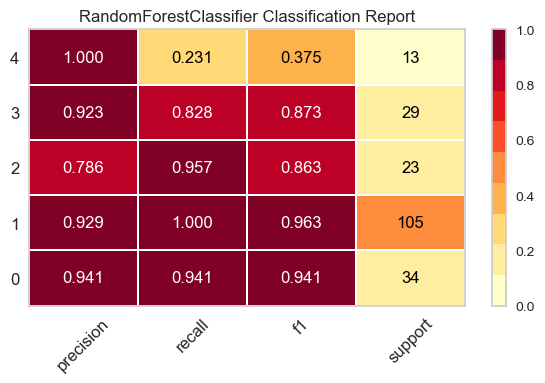

In [103]:
plt.figure(figsize = (6,4))
plot_model(best_model, plot = 'class_report')

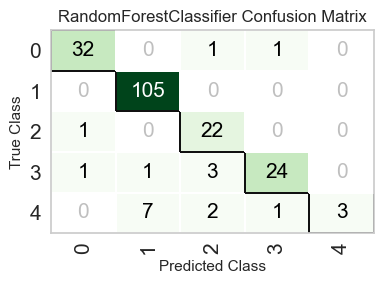

In [104]:
plt.figure(figsize = (4,3))
plot_model(best_model, plot = 'confusion_matrix')

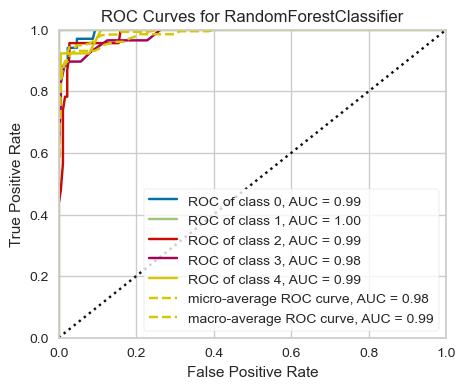

In [105]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'auc')

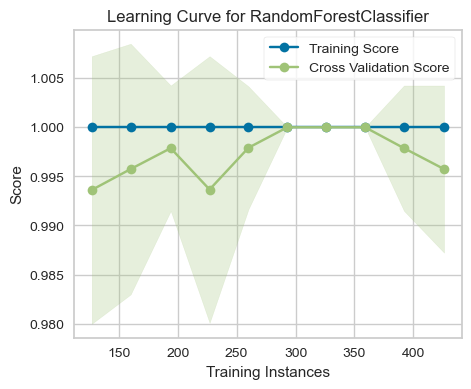

In [106]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'learning')

In [107]:
# Custom cost-benefit scoring function
def custom_cost_benefit(y_true, y_pred):
    maintenance_cost = 2050
    failure_cost = 10300
    tp = np.where((y_pred==1) & (y_true==1), failure_cost-maintenance_cost, 0)
    fp = np.where((y_pred==1) & (y_true==0), -maintenance_cost, 0)
    
    # Negative score because PyCaret optimizes for higher values, we want to minimize cost
    score = np.sum([fp, tp])
    return score

# Add custom cost-benefit metric to PyCaret
add_metric('cost_benefit', 'Cost-Benefit', custom_cost_benefit)

Name                                                      Cost-Benefit
Display Name                                              Cost-Benefit
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(custom_cost_benefit, response_meth...
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: cost_benefit, dtype: object

In [108]:
best_model = compare_models(sort = 'Cost-Benefit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Cost-Benefit,TT (Sec)
lr,Logistic Regression,0.8587,0.0000,0.8587,0.8740,0.8581,0.7913,0.7955,0.0000,0.0720
knn,K Neighbors Classifier,0.5547,0.7328,0.5547,0.5365,0.5168,0.2823,0.2961,0.0000,0.0400
nb,Naive Bayes,0.8442,0.9865,0.8442,0.8174,0.8214,0.7675,0.7764,0.0000,0.0270
dt,Decision Tree Classifier,0.6288,0.7900,0.6288,0.5406,0.5576,0.4546,0.5337,0.0000,0.0290
svm,SVM - Linear Kernel,0.4996,0.0000,0.4996,0.4787,0.4334,0.2503,0.2938,0.0000,0.0290
ridge,Ridge Classifier,0.8882,0.0000,0.8882,0.8547,0.8628,0.8322,0.8414,0.0000,0.0280
rf,Random Forest Classifier,0.8860,0.9954,0.8860,0.8662,0.8647,0.8245,0.8329,0.0000,0.0880
qda,Quadratic Discriminant Analysis,0.6014,0.0000,0.6014,0.5321,0.5439,0.4254,0.5038,0.0000,0.0240
ada,Ada Boost Classifier,0.6518,0.0000,0.6518,0.5526,0.5747,0.4800,0.5542,0.0000,0.0550
gbc,Gradient Boosting Classifier,0.5253,0.0000,0.5253,0.2836,0.3661,0.0421,0.0697,0.0000,0.3540


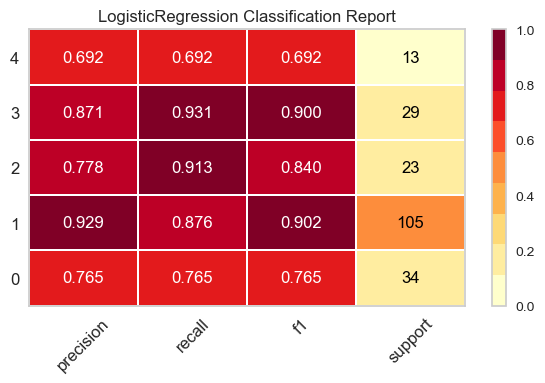

In [109]:
plt.figure(figsize = (6,4))
plot_model(best_model, plot = 'class_report')

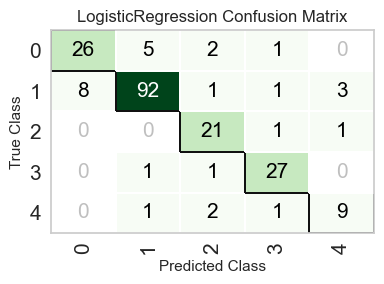

In [110]:
plt.figure(figsize = (4,3))
plot_model(best_model, plot = 'confusion_matrix')

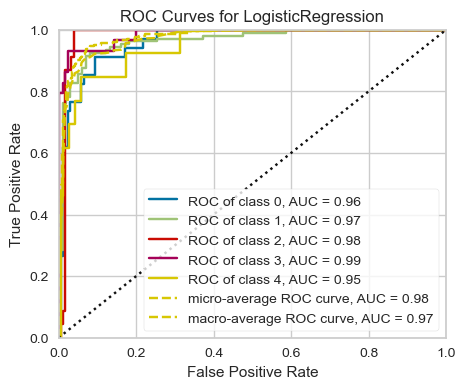

In [111]:
plt.figure(figsize = (5,4))
plot_model(best_model, plot = 'auc')

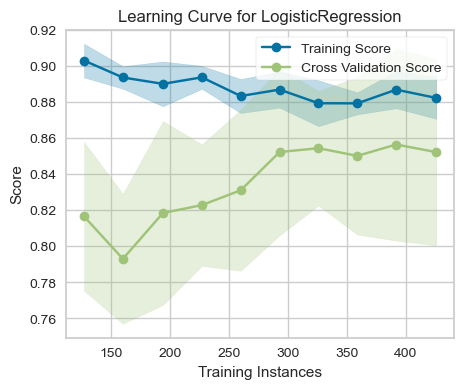

In [112]:
plt.figure(figsize = (5, 4))
plot_model(best_model, plot = 'learning')